In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 40,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01])

In [5]:
output = np.load("output.npy")
output

array([-0.95332503, -0.92011762, -0.87067926, -0.80673462, -0.72664982,
       -0.6295045 , -0.51608354, -0.39027759, -0.25941375, -0.13179824,
       -0.01229022,  0.09983977,  0.2087644 ,  0.31856743,  0.43100587,
        0.54469228,  0.65530688,  0.75680256,  0.8433274 ,  0.91096622,
        0.95839024,  0.98634923,  0.99665821,  0.99132085,  0.97201979,
        0.939928  ,  0.89572382,  0.83971882,  0.77204663,  0.69287592,
        0.6026001 ,  0.50195622,  0.39205647,  0.27436021,  0.15064213,
        0.02298426, -0.10623097, -0.23435897, -0.35858494, -0.47607589,
       -0.58418685, -0.68068433, -0.7639299 , -0.83297348, -0.88752097,
       -0.92779565, -0.9543364 , -0.96778202, -0.96867907, -0.95732439,
       -0.93364966, -0.89714622, -0.84685129, -0.78144413, -0.69957149,
       -0.60057408, -0.48571104, -0.35944456, -0.22935978, -0.10326896,
        0.01498237,  0.12683848,  0.23645565,  0.34736943,  0.46055913,
        0.57385713,  0.68240333,  0.7800858 ,  0.86150599,  0.92

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   4.73526448e-01],
       [  2.00000000e+01,   5.08257747e-01],
       [  3.00000000e+01,   4.54759717e-01],
       [  4.00000000e+01,   2.80228168e-01],
       [  5.00000000e+01,   1.65138155e-01],
       [  6.00000000e+01,   1.09463006e-01],
       [  7.00000000e+01,   7.65380561e-02],
       [  8.00000000e+01,   6.26570210e-02],
       [  9.00000000e+01,   4.47940640e-02],
       [  1.00000000e+02,   4.65185940e-02],
       [  1.10000000e+02,   3.54321599e-02],
       [  1.20000000e+02,   2.85149198e-02],
       [  1.30000000e+02,   2.11832710e-02],
       [  1.40000000e+02,   1.79777406e-02],
       [  1.50000000e+02,   1.71740204e-02],
       [  1.60000000e+02,   1.81729309e-02],
       [  1.70000000e+02,   1.42980386e-02],
       [  1.80000000e+02,   1.55191096e-02],
       [  1.90000000e+02,   1.29750585e-02],
       [  2.00000000e+02,   1.27227064e-02],
       [  2.10000000e+02,   1.07249832e-02],
       [  2.20000000e+02,   1.07771801e-02],
       [  

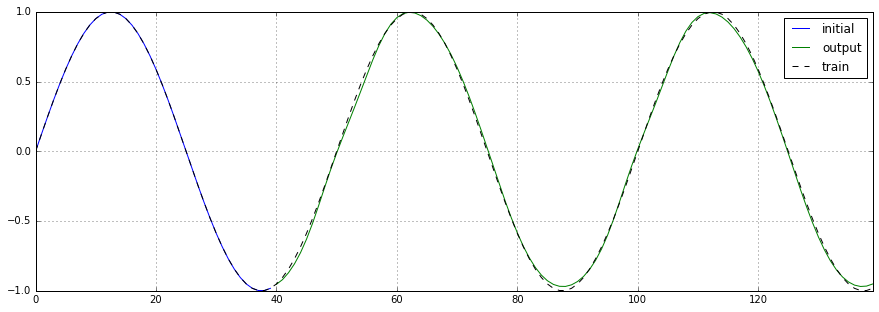

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

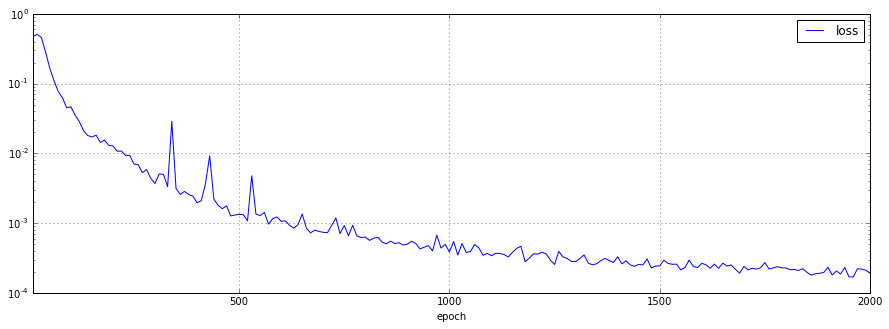

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")